# 作業 3

本作業需要先學習[程式教材](https://github.com/IKMLab/course_material)中的以下部份：

- [jupyter-基本功能](https://github.com/IKMLab/course_material/blob/master/jupyter-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [python-入門語法](https://github.com/IKMLab/course_material/blob/master/python-%E5%85%A5%E9%96%80%E8%AA%9E%E6%B3%95.ipynb)
- [numpy-基本功能](https://github.com/IKMLab/course_material/blob/master/numpy-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [pandas-基本功能](https://github.com/IKMLab/course_material/blob/master/pandas-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [matplotlib-資料視覺化](https://github.com/IKMLab/course_material/blob/master/matplotlib-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb)
- [scikit-learn-基本功能](https://github.com/IKMLab/course_material/blob/master/scikit-learn-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows 10|1909 18363.815|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.7.7|
|安裝環境|pip|20.0.2|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 參考連結

- 有無參考他人之實驗結果：有
- 參考連結：
  

In [68]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑

In [69]:
# 匯入 matplotlib
# matplotlib.pyplot 是主要用於繪圖的模組
import matplotlib.pyplot as plt

# 匯入 seaborn
import seaborn as sns

## 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目可以包含：

- 資料視覺化
- 相關係數
- 決定輸入特徵
- 處理缺失值
- 轉換數值
- 轉換類別
- 其他

請以 `markdown` 簡單描述**流程**、**方法**與**原因**：

1. 觀察...，發現...
2. 填補...，策略...
3. 轉換...，原因...



### 資料集標籤含意
- Date: 日期
- Open Price: 開盤價格
- Close Price: 收盤價格
- High Price: 股價最高價格
- Low Price: 股價最高價格

In [70]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2264 non-null   object 
 1   Open Price   2264 non-null   float64
 2   Close Price  2264 non-null   float64
 3   High Price   2264 non-null   float64
 4   Low Price    2264 non-null   float64
 5   Volume       2264 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 106.2+ KB


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272


### 資料選取


### 資料前處理


In [71]:
from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder

In [72]:
train_x_1 = df[['Open Price', 'Close Price', 'High Price', 'Low Price']]                   # 取出訓練資料需要分析的資料欄位
train_x_1.info()
# train_x_1.head(10)
df['Close Price'][1]
train_y_1 = df['Close Price']
print(train_y_1)
for i in range(len(df.index)-1, -1, -1):
    if i == 0:
        train_y_1[i] = 1
    elif train_y_1[i]>=train_y_1[i-1]:
        train_y_1[i] = 1
    else:
        train_y_1[i] = 0
print(train_y_1)
# train_y_1 = df['Close Price'];                      # 取出訓練資料的答案
# train_y_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open Price   2264 non-null   float64
 1   Close Price  2264 non-null   float64
 2   High Price   2264 non-null   float64
 3   Low Price    2264 non-null   float64
dtypes: float64(4)
memory usage: 70.9 KB
0        931.80
1        927.45
2        934.70
3        906.65
4        909.73
         ...   
2259    2683.34
2260    2680.50
2261    2682.62
2262    2687.54
2263    2673.61
Name: Close Price, Length: 2264, dtype: float64


C:\Users\C44051037\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\C44051037\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
2259    0.0
2260    0.0
2261    1.0
2262    1.0
2263    0.0
Name: Close Price, Length: 2264, dtype: float64


C:\Users\C44051037\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


大部分都不需要經過處理即可使用

## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，**需要**包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
    - 準確度必須**超越**課堂使用的範例
    
如果有進行多於一個以上的實驗，**可以保留所有**的實驗結果，但是執行時間將會納入**全部**實驗。

In [73]:
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree              # 匯入決策樹繪圖工具

average train accuracy: 1.0
    min train accuracy: 1.0
    max train accuracy: 1.0
average valid accuracy: 0.7623649612221376
    min valid accuracy: 0.7350993377483444
    max valid accuracy: 0.7880794701986755


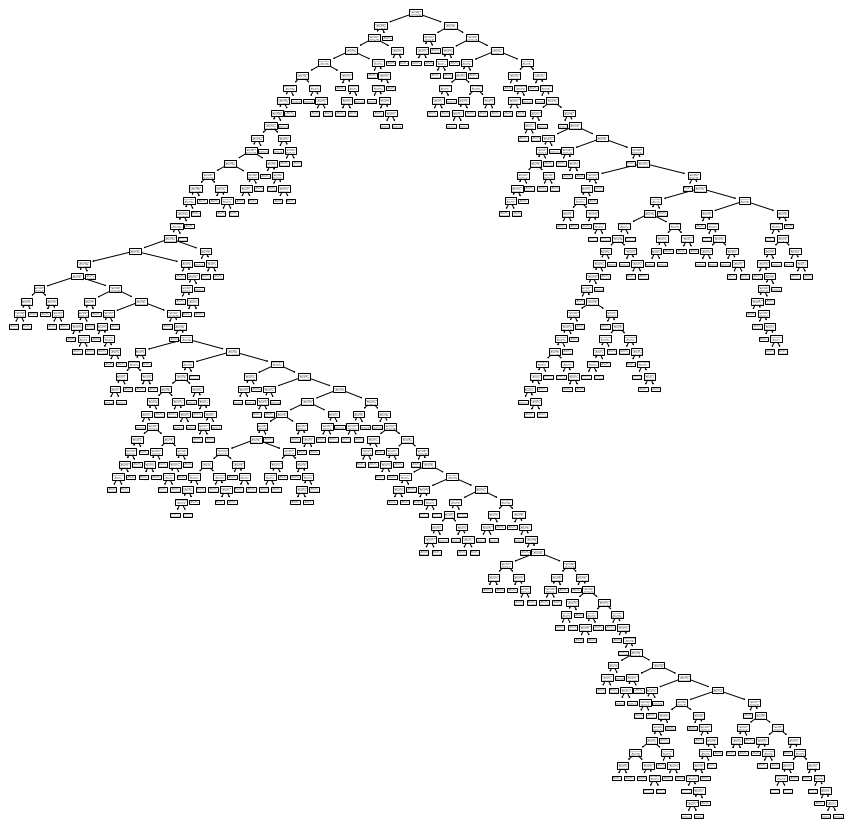

In [74]:
# 決策樹模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x_1)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x_1):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x_1.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y_1.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x_1.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y_1.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

fig, ax = plt.subplots(figsize=(15, 15))        # 創造繪圖環境

plot_tree(model, ax=ax)                         # 繪製訓練後的模型

plt.show()                                      # 繪製圖表

## END

In [75]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 16.540897130966187
